XORModel(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (activation1): Sigmoid()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
)
Epoch 1000/10000, Loss = 0.2726692631840706
Epoch 2000/10000, Loss = 0.27059856429696083
Epoch 3000/10000, Loss = 0.2685358598828316
Epoch 4000/10000, Loss = 0.2639295868575573
Epoch 5000/10000, Loss = 0.22337748296558857
Epoch 6000/10000, Loss = 0.00014278387288868544
Epoch 7000/10000, Loss = 1.2648548874949483e-11
Epoch 8000/10000, Loss = 3.161915174132446e-12
Epoch 9000/10000, Loss = 3.161915174132446e-12
Epoch 10000/10000, Loss = 3.161915174132446e-12
9
Input =  tensor([0., 1.], device='cuda:0')
Output =  tensor([1.0000], device='cuda:0', grad_fn=<ViewBackward0>)


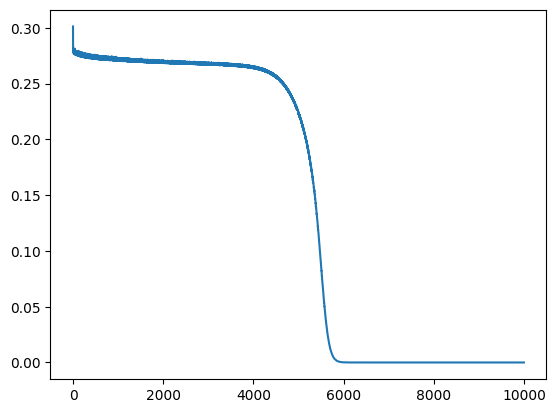

In [1]:
"""
References:
https://discuss.pytorch.org/t/unable-to-learn-xor-representation-using-2-layers-of-multi-layered-perceptron-mlp/13287/7
https://stackoverflow.com/questions/48619928/unable-to-learn-xor-representation-using-2-layers-of-multi-layered-perceptron-m
"""
import torch
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import numpy as np

loss_list = []
torch.manual_seed(42)

"""
Step 1: Initialize inputs and expected outputs as per the truth table of XOR
Create the tensors x1,x2 and y.
They are the training examples in the dataset for the XOR
"""
X = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float32)
Y = torch.tensor([0,1,1,0], dtype=torch.float32)

"""
Step 2: Define XORModel class - write constructor and forward function
"""
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        # self.w = torch.nn.Parameter(torch.rand([1]))
        # self.b = torch.nn.Parameter(torch.rand([1]))

        self.linear1 = nn.Linear(2, 2, bias=True)
        self.activation1 = nn.Sigmoid()
        self.linear2 = nn.Linear(2, 1, bias=True)
        # self.activation2 = nn.ReLU()
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        # x = self.activation2(x)
        return x
    
"""
Step 3: Create DataLoader. Write Dataset class with necessary constructors and methods –
len() and getitem()
"""
class MyDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx].to(device), self.Y[idx].to(device)
    
#Create the dataset
full_dataset = MyDataset(X, Y)
batch_size = 1

#Create the dataloaders for reading data - This provides a way to read the dataset in batches, also shuffle the data
train_data_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=True)

#Find if CUDA is available to load the model and device on to the available device CPU/GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#Load the model to GPU
model = XORModel().to(device)
print(model)

#Add the criterion which is the MSELoss
loss_fn = torch.nn.MSELoss()

#Optimizers specified in the torch.optim package
optimizer = torch.optim.SGD(model.parameters(), lr=0.03)

def train_one_epoch(epoch_index):
    totalloss = 0
    for i,data in enumerate(train_data_loader):
        inputs,labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs.flatten(),labels)
        loss.backward()
        optimizer.step()
        totalloss += loss.item()
    return totalloss/(len(train_data_loader)*batch_size)

EPOCHS = 10000
for epoch in range(1,EPOCHS+1):
    model.train(True)
    avg_loss = train_one_epoch(epoch)
    loss_list.append(avg_loss)
    if epoch%1000 == 0:
        print(f"Epoch {epoch}/{EPOCHS}, Loss = {avg_loss}")
        
total_params = 0
for name,param in model.named_parameters():
    params = param.numel()
    total_params += params
print(total_params)

input = torch.tensor([0.,1.]).to(device)
model.eval()
print("Input = ",input)
print("Output = ",model(input))
plt.plot(loss_list)
plt.show()

XORModel(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (activation1): Sigmoid()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
  (activation2): ReLU()
)
Epoch 1000/10000, Loss = 0.2726692631840706
Epoch 2000/10000, Loss = 0.27059856429696083
Epoch 3000/10000, Loss = 0.2685358598828316
Epoch 4000/10000, Loss = 0.2639295868575573
Epoch 5000/10000, Loss = 0.22337748296558857
Epoch 6000/10000, Loss = 0.00014278387288868544
Epoch 7000/10000, Loss = 1.2648548874949483e-11
Epoch 8000/10000, Loss = 3.161915174132446e-12
Epoch 9000/10000, Loss = 3.161915174132446e-12
Epoch 10000/10000, Loss = 3.161915174132446e-12
9
Input =  tensor([0., 1.], device='cuda:0')
Output =  tensor([1.0000], device='cuda:0', grad_fn=<ReluBackward0>)


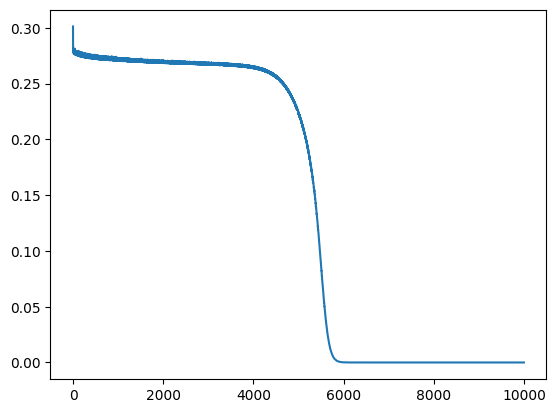

In [2]:
############### Q2
"""
References:
https://discuss.pytorch.org/t/unable-to-learn-xor-representation-using-2-layers-of-multi-layered-perceptron-mlp/13287/7
https://stackoverflow.com/questions/48619928/unable-to-learn-xor-representation-using-2-layers-of-multi-layered-perceptron-m
"""
import torch
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import numpy as np

loss_list = []
torch.manual_seed(42)

"""
Step 1: Initialize inputs and expected outputs as per the truth table of XOR
Create the tensors x1,x2 and y.
They are the training examples in the dataset for the XOR
"""
X = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float32)
Y = torch.tensor([0,1,1,0], dtype=torch.float32)

"""
Step 2: Define XORModel class - write constructor and forward function
"""
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        # self.w = torch.nn.Parameter(torch.rand([1]))
        # self.b = torch.nn.Parameter(torch.rand([1]))

        self.linear1 = nn.Linear(2, 2, bias=True)
        self.activation1 = nn.Sigmoid()
        self.linear2 = nn.Linear(2, 1, bias=True)
        self.activation2 = nn.ReLU()
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        x = self.activation2(x)
        return x
    
"""
Step 3: Create DataLoader. Write Dataset class with necessary constructors and methods –
len() and getitem()
"""
class MyDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx].to(device), self.Y[idx].to(device)
    
#Create the dataset
full_dataset = MyDataset(X, Y)
batch_size = 1

#Create the dataloaders for reading data - This provides a way to read the dataset in batches, also shuffle the data
train_data_loader = DataLoader(full_dataset, batch_size=batch_size, shuffle=True)

#Find if CUDA is available to load the model and device on to the available device CPU/GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#Load the model to GPU
model = XORModel().to(device)
print(model)

#Add the criterion which is the MSELoss
loss_fn = torch.nn.MSELoss()

#Optimizers specified in the torch.optim package
optimizer = torch.optim.SGD(model.parameters(), lr=0.03)

def train_one_epoch(epoch_index):
    totalloss = 0
    for i,data in enumerate(train_data_loader):
        inputs,labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs.flatten(),labels)
        loss.backward()
        optimizer.step()
        totalloss += loss.item()
    return totalloss/(len(train_data_loader)*batch_size)

EPOCHS = 10000
for epoch in range(1,EPOCHS+1):
    model.train(True)
    avg_loss = train_one_epoch(epoch)
    loss_list.append(avg_loss)
    if epoch%1000 == 0:
        print(f"Epoch {epoch}/{EPOCHS}, Loss = {avg_loss}")
        
total_params = 0
for name,param in model.named_parameters():
    params = param.numel()
    total_params += params
print(total_params)

input = torch.tensor([0.,1.]).to(device)
model.eval()
print("Input = ",input)
print("Output = ",model(input))
plt.plot(loss_list)
plt.show()